In [1]:
import torch
import numpy as np


In [26]:
emp = torch.zeros(10, dtype=torch.double)
print(emp)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)


In [28]:
a = torch.rand(5)
b = torch.rand(5)
print(a)
print(b)


tensor([0.5021, 0.0769, 0.3110, 0.8896, 0.5774])
tensor([0.4668, 0.4422, 0.6173, 0.3604, 0.2139])


In [30]:
print(a)
print(b)
torch.add(a,b)

tensor([0.5021, 0.0769, 0.3110, 0.8896, 0.5774])
tensor([0.4668, 0.4422, 0.6173, 0.3604, 0.2139])


tensor([0.9689, 0.5191, 0.9284, 1.2500, 0.7913])

In [31]:
print(a)
print(b)
torch.mul(a,b)

tensor([0.5021, 0.0769, 0.3110, 0.8896, 0.5774])
tensor([0.4668, 0.4422, 0.6173, 0.3604, 0.2139])


tensor([0.2344, 0.0340, 0.1920, 0.3206, 0.1235])

In [33]:
a = torch.rand(2,2)
b = torch.rand(2,2)

print(a)
print(b)

tensor([[0.2672, 0.8568],
        [0.5140, 0.8628]])
tensor([[0.4978, 0.0597],
        [0.4096, 0.3829]])


In [34]:
torch.mul(a,b)

tensor([[0.1330, 0.0511],
        [0.2105, 0.3304]])

In [35]:
# we can also perform this inplace
# every pytorch function that has an underscore will do an inplace operation
a = torch.rand(2,2)
b = torch.rand(2,2)

print(a)
print(b)

print(b.add_(a))

tensor([[0.1264, 0.2980],
        [0.9646, 0.9455]])
tensor([[0.7507, 0.5010],
        [0.2939, 0.1281]])
tensor([[0.8771, 0.7991],
        [1.2585, 1.0736]])


In [42]:
a = torch.rand(5,3)
print(a)
print(a[:,0])
print(a[1,:])

tensor([[0.7268, 0.2625, 0.9404],
        [0.1102, 0.3709, 0.4381],
        [0.2687, 0.9047, 0.4142],
        [0.0689, 0.5169, 0.5343],
        [0.1478, 0.1934, 0.0951]])
tensor([0.7268, 0.1102, 0.2687, 0.0689, 0.1478])
tensor([0.1102, 0.3709, 0.4381])


In [43]:
a

tensor([[0.7268, 0.2625, 0.9404],
        [0.1102, 0.3709, 0.4381],
        [0.2687, 0.9047, 0.4142],
        [0.0689, 0.5169, 0.5343],
        [0.1478, 0.1934, 0.0951]])

In [45]:
a[2,0].item()

0.26865553855895996

In [47]:
# reshaping 

a = torch.rand(3,4)
print(a)

tensor([[0.8981, 0.0452, 0.1166, 0.9465],
        [0.5517, 0.0660, 0.1327, 0.2971],
        [0.8026, 0.6772, 0.7163, 0.6638]])


In [54]:
a.view(-1,6)

tensor([[0.8981, 0.0452, 0.1166, 0.9465, 0.5517, 0.0660],
        [0.1327, 0.2971, 0.8026, 0.6772, 0.7163, 0.6638]])

In [56]:
x = torch.rand(5, requires_grad=True)
print(x)

tensor([0.7099, 0.4568, 0.6382, 0.4265, 0.4892], requires_grad=True)


In [72]:
y = x+2
print(y)

z = y*y*2
print(z)

z = z.mean()
print(z)

z.backward()
print(x.grad)

tensor([2.7099, 2.4568, 2.6382, 2.4265, 2.4892], grad_fn=<AddBackward0>)
tensor([14.6871, 12.0715, 13.9202, 11.7758, 12.3921], grad_fn=<MulBackward0>)
tensor(12.9693, grad_fn=<MeanBackward0>)
tensor([10.8396,  9.8271, 10.5528,  9.7060,  9.9567])


In [80]:
# back propagation manually

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad= True)

#forward pass
y_pred = w*x
loss = (y_pred - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

# update weights
# next foward and back

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [99]:
# manual calculations

# f1 = w *x
# f2 = 2*x

X = np.array([1,2,3,4,5], dtype=float)
Y = np.array([2,4,6,8,10], dtype=float)
w = 0.0

# forward pass
def forward(X):
    return w*X

# calculate loss - MSE
def loss(y,y_pred):
    return ((y_pred - y) ** 2).mean()

# gradient MSE
# MSE = 1/N * (w*x - y)**2
# dl/dw = 1/N 2x(w*x - y)

def gradient(x,y,y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training : f(6) = {forward(6):.3f}')

learning_rate = 0.002
n_iters = 50

for epoch in range(n_iters):
    y_pred = forward(X)
    l = loss(Y, y_pred)
    dw = gradient(X,Y, y_pred)
    
    w -= learning_rate * dw
    if epoch %2 == 0:
        print(f'epoch {epoch+1}: w= {w:.3f}, loss : {l:.8f}')    

Prediction before training : f(6) = 0.000
epoch 1: w= 0.440, loss : 44.00000000
epoch 3: w= 1.051, loss : 16.28662464
epoch 5: w= 1.423, loss : 6.02850323
epoch 7: w= 1.649, loss : 2.23145385
epoch 9: w= 1.786, loss : 0.82597389
epoch 11: w= 1.870, loss : 0.30573470
epoch 13: w= 1.921, loss : 0.11316787
epoch 15: w= 1.952, loss : 0.04188915
epoch 17: w= 1.971, loss : 0.01550529
epoch 19: w= 1.982, loss : 0.00573929
epoch 21: w= 1.989, loss : 0.00212440
epoch 23: w= 1.993, loss : 0.00078635
epoch 25: w= 1.996, loss : 0.00029107
epoch 27: w= 1.998, loss : 0.00010774
epoch 29: w= 1.999, loss : 0.00003988
epoch 31: w= 1.999, loss : 0.00001476
epoch 33: w= 1.999, loss : 0.00000546
epoch 35: w= 2.000, loss : 0.00000202
epoch 37: w= 2.000, loss : 0.00000075
epoch 39: w= 2.000, loss : 0.00000028
epoch 41: w= 2.000, loss : 0.00000010
epoch 43: w= 2.000, loss : 0.00000004
epoch 45: w= 2.000, loss : 0.00000001
epoch 47: w= 2.000, loss : 0.00000001
epoch 49: w= 2.000, loss : 0.00000000


In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
# 0. prepare data
# 1. model
# 2. loss and optim
# 3. training 
# # create data
X,y = datasets.make_regression(100, 1, random_state=42, noise = 20)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

y

tensor([ 6.2687e+01, -2.3764e+01, -2.5687e+01,  7.9365e+00, -1.5475e+01,
         3.6094e+01, -4.0794e+01, -1.0823e+01,  2.1415e+01,  2.2799e+01,
         3.7224e+01,  8.9567e+01,  4.1551e+01,  1.5018e+01, -6.1876e+01,
         2.1404e+01, -8.9110e+01,  1.8679e+01,  1.4234e+01, -1.2670e+02,
         1.2823e+01,  1.5695e+00, -3.9292e+01,  1.8950e+01,  8.4121e+01,
         6.7974e+01,  3.0328e+00,  6.9943e+00, -4.2729e+01, -7.4268e+01,
         2.5665e+01,  4.3362e+01,  6.3743e-01, -2.1273e+01, -4.9396e+01,
        -1.6240e+01, -2.7917e+01,  7.1497e-02,  6.8466e+01,  1.5671e+01,
         3.0485e+01, -3.4745e+01,  6.0252e+01, -1.9758e+01, -5.4750e+00,
         4.5444e+00, -1.5787e+01, -4.9537e+01,  3.3266e+01,  8.9011e+00,
         1.8640e+00,  1.4416e+01, -5.0219e+01,  1.1638e+02,  3.4709e+01,
         3.5220e+01,  2.6180e+01,  9.1984e+00, -7.9423e+00, -8.7755e+01,
         4.0805e+01, -9.5718e+00, -4.2683e+01, -3.8354e+01, -6.7932e+01,
         5.5239e+01, -8.5184e+01, -8.8515e+01, -2.3

In [6]:
y.shape

torch.Size([100])

In [4]:
y = y.view(y.shape[0],1)
y

tensor([[ 6.2687e+01],
        [-2.3764e+01],
        [-2.5687e+01],
        [ 7.9365e+00],
        [-1.5475e+01],
        [ 3.6094e+01],
        [-4.0794e+01],
        [-1.0823e+01],
        [ 2.1415e+01],
        [ 2.2799e+01],
        [ 3.7224e+01],
        [ 8.9567e+01],
        [ 4.1551e+01],
        [ 1.5018e+01],
        [-6.1876e+01],
        [ 2.1404e+01],
        [-8.9110e+01],
        [ 1.8679e+01],
        [ 1.4234e+01],
        [-1.2670e+02],
        [ 1.2823e+01],
        [ 1.5695e+00],
        [-3.9292e+01],
        [ 1.8950e+01],
        [ 8.4121e+01],
        [ 6.7974e+01],
        [ 3.0328e+00],
        [ 6.9943e+00],
        [-4.2729e+01],
        [-7.4268e+01],
        [ 2.5665e+01],
        [ 4.3362e+01],
        [ 6.3743e-01],
        [-2.1273e+01],
        [-4.9396e+01],
        [-1.6240e+01],
        [-2.7917e+01],
        [ 7.1497e-02],
        [ 6.8466e+01],
        [ 1.5671e+01],
        [ 3.0485e+01],
        [-3.4745e+01],
        [ 6.0252e+01],
        [-1

In [14]:
y.shape

torch.Size([100])

In [10]:
n_samples, n_features = X.shape
input_size = n_samples
output_size = 1

torch.Size([100, 1])
torch.Size([100, 1])
epoch : 1.000, loss : 2174.6143
epoch : 101.000, loss : 1648.8665
epoch : 201.000, loss : 1273.1729
epoch : 301.000, loss : 1004.1741
epoch : 401.000, loss : 811.2104
epoch : 501.000, loss : 672.5488
epoch : 601.000, loss : 572.7465
epoch : 701.000, loss : 500.8051
epoch : 801.000, loss : 448.8744
epoch : 901.000, loss : 411.3400


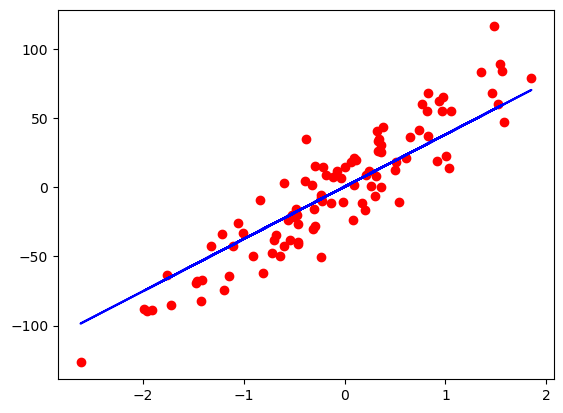

In [29]:
# linear regression

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import numpy as np
from sklearn import datasets
# prepare data
X,y = datasets.make_regression(100,1, noise = 20, random_state= 42)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

print(X.shape)
y = y.view(y.shape[0], 1)
print(y.shape)


# model
n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)
    
# loss and optim
learning_rate = 0.001
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr = learning_rate)


# training loop

epochs = 1000
for epoch in range(epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred , y)
    
    # ackward pass 
    loss.backward() #back
    optim.step() # update
    optim.zero_grad() # empty gradients
    
    if epoch%100 == 0:
        print(f'epoch : {epoch+1:.3f}, loss : {loss.item():.4f}')
    
preds = model(X).detach().numpy()
plt.plot(X,y, 'ro')
plt.plot(X, preds, 'b')
plt.show()